# Losses can have non optimal local minimas

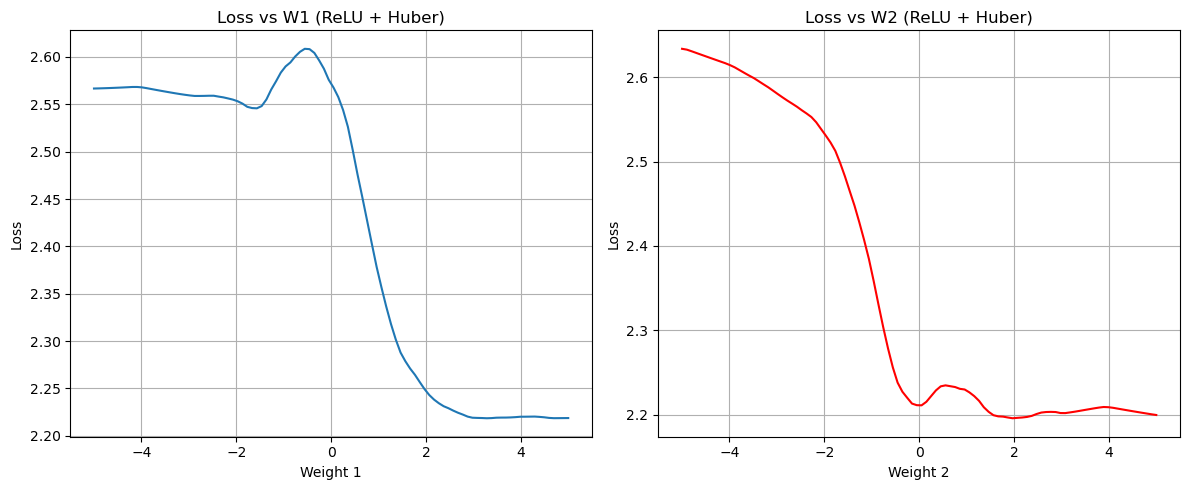

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset: y = 4 + 2*x1 + 3*x2 + noise
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1  
y = 4 + 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100) * 0.5  

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    abs_error = np.abs(error)
    quadratic = 0.5 * (error ** 2)
    linear = delta * (abs_error - 0.5 * delta)
    return np.mean(np.where(abs_error < delta, quadratic, linear))

# Loss function with non-linearity
def compute_loss(w1, w2, X, y):
    b1, b2 = 0.5, -0.5  
    W_out = np.array([[2.0], [-2.0]])  
    b_out = 0.3  

    hidden_input = np.dot(X, np.array([[w1, w2]]).T) + np.array([[b1, b2]])
    hidden_output = relu(hidden_input)  
    final_output = np.dot(hidden_output, W_out) + b_out  

    return huber_loss(y, final_output.flatten(), delta=1.0)

# Generate weight range
w_values = np.linspace(-5, 5, 100)
loss_w1 = np.zeros(100)
loss_w2 = np.zeros(100)

fixed_w1, fixed_w2 = 1.0, -1.0  

# Compute loss for individual weights
for i, w in enumerate(w_values):
    loss_w1[i] = compute_loss(w, fixed_w2, X, y)
    loss_w2[i] = compute_loss(fixed_w1, w, X, y)

# Plot Loss vs W1 and W2
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(w_values, loss_w1, label="Loss w.r.t W1")
axes[0].set_xlabel("Weight 1")
axes[0].set_ylabel("Loss")
axes[0].set_title("Loss vs W1 (ReLU + Huber)")
axes[0].grid()

axes[1].plot(w_values, loss_w2, label="Loss w.r.t W2", color='r')
axes[1].set_xlabel("Weight 2")
axes[1].set_ylabel("Loss")
axes[1].set_title("Loss vs W2 (ReLU + Huber)")
axes[1].grid()

plt.tight_layout()
plt.show()


GD

In [4]:
import pandas as pd

In [7]:
x1=np.random.randint(low=1,high=20,size=2000)
x2=np.random.randint(low=1,high=20,size=2000)
y=3+2*x1-4*x2+np.random.random(2000)
x=pd.DataFrame({'intercept':np.ones(2000),'x1':x1,"x2":x2})

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
sk_model=LinearRegression()

In [13]:
sk_model.fit(pd.DataFrame({'x1':x1,"x2":x2}),y)

LinearRegression()

In [15]:
sk_w=(sk_model.intercept_)+list(sk_model.coef_)

In [17]:
sk_w

array([ 5.49413157, -0.50580493])

In [19]:
w=np.random.random(x.shape[1])

In [21]:
w

array([0.84001883, 0.54498228, 0.08678295])

In [23]:
def my_pred(x,w):
    preds=x@w
    return preds

In [25]:
def myerror(y,x,w):
    errors=y-my_pred(x,w)
    return errors

In [27]:
def mycost(y,x,w):
    error=myerror(y,x,w)
    cost=error.T@error
    return cost

In [49]:
def grad(y,x,w):
    error=myerror(y,x,w)
    grad=-x.T@error/x.shape[0]
    return np.array(grad)

In [51]:
grad(y,x,w)

array([ 24.34767883, 199.96302748, 369.90330006])

In [73]:
def lr_gd(y,x,learning_rate, num_steps):
    wts=np.random.random(x.shape[1])
    cost=[]
    for i in range(num_steps):
        rand_ind=np.random.choice(range(x.shape[0]),10)
        ysub=y[rand_ind]
        xsub=x.iloc[rand_ind,:]
        wts-=learning_rate*grad(ysub,xsub,wts)
        cost.append(mycost(y,x,w))
        if i%100==0:
            print(mycost(y,x,wts),wts)

In [75]:
lr_gd(y,x,0.0001,1000)

2870541.6947311247 [0.80025557 0.28303794 0.58710883]
658746.3700867977 [ 0.70071902 -0.09434196 -1.4520723 ]
343095.17090542545 [ 0.69469463  0.41199341 -2.20401846]
191480.2636594414 [ 0.69832713  0.84829057 -2.6294433 ]
108901.95964410724 [ 0.70165318  1.15993391 -2.94588952]
60828.421628514225 [ 0.70669521  1.41422483 -3.18089491]
35690.11334026992 [ 0.71070943  1.59119041 -3.34693135]
20088.119646485287 [ 0.71338604  1.727165   -3.4955652 ]
11417.912742034157 [ 0.71716945  1.83970889 -3.60155374]
7167.414845996912 [ 0.72049594  1.9101357  -3.67891587]


In [117]:
def lr_gd(y,x,learning_rate, num_steps):
    wts=np.random.random(x.shape[1])
    cost=[]
    g=0.9
    v=np.zeros(x.shape[1])
    for i in range(num_steps):
        rand_ind=np.random.choice(range(x.shape[0]),10)
        ysub=y[rand_ind]
        xsub=x.iloc[rand_ind,:]
        v=g*v+(1-g)*grad(ysub,xsub,wts)
        wts-=learning_rate*v
        cost.append(mycost(y,x,wts))
        #if i%100==0:
            #print(mycost(y,x,wts),wts)
    return cost,wts

In [119]:
cost,w=lr_gd(y,x,0.0001,1000)

In [120]:
w

array([ 0.68574261,  1.98215405, -3.74354062])

In [121]:
cost

[3854754.6899288064,
 3825384.261650294,
 3788161.429969673,
 3739761.521169451,
 3683500.3930366654,
 3622748.7814794728,
 3551891.8629305996,
 3477201.224319001,
 3403700.434500645,
 3329110.44361969,
 3250650.5743739875,
 3171634.422911118,
 3090555.805196112,
 3012771.9421147946,
 2933757.951442517,
 2858903.8140174327,
 2785133.066091491,
 2712145.418896827,
 2639636.45800633,
 2563765.9790398506,
 2488230.236002337,
 2407868.7395956856,
 2332751.69403194,
 2259156.1124444064,
 2186257.0918908985,
 2114331.00065572,
 2046744.769149868,
 1984779.2018487384,
 1924784.9206717648,
 1865368.7291272548,
 1807565.8437608164,
 1753022.4574551152,
 1702138.8652679296,
 1654336.845225893,
 1607557.7030785715,
 1564240.9382006668,
 1520715.4447914138,
 1479390.51878585,
 1440690.5052980015,
 1404198.8001628926,
 1369272.6625225504,
 1334982.6260408734,
 1301239.6022057077,
 1270206.8063650518,
 1241572.635562931,
 1214738.43787784,
 1188893.300939539,
 1163178.8096068292,
 1137876.8324631015